<a href="https://colab.research.google.com/github/tutalae/BTC/blob/master/Corr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to create a stock correlation matrix in python
from
https://medium.com/analytics-vidhya/how-to-create-a-stock-correlation-matrix-in-python-4f32f8cb5b50

In [2]:
#Import the libraries
import numpy as np 
import pandas as pd 
# Used to grab the stock prices, with yahoo 
import pandas_datareader as web 
from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import seaborn

In [3]:
#Select the list of tickers and select the daterange
start = datetime(2017, 1, 1)
symbols_list = ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X',"AUDUSD=X" , 'USDCAD=X', 'USDCHF=X', 'NZDUSD=X', 'EURJPY=X', 'GBPJPY=X', 
                'EURGBP=X', 'AUDJPY=X']
#array to store prices
symbols=[]

In [4]:
#Pull stock prices, push into clean dataframe
#array to store prices
symbols=[]
for ticker in symbols_list:     
    r = web.DataReader(ticker, 'yahoo', start)   
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()
df_pivot=df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
0,2017-01-02,84.081001,0.720981,0.85143,122.930000,1.052698,144.063004,1.234903,0.693433,1.34340,1.01869,116.794998
1,2017-01-03,84.512001,0.719683,0.85150,122.870003,1.046003,144.259995,1.228199,0.693193,1.34414,1.02419,117.495003
2,2017-01-04,85.040001,0.722993,0.85085,122.570000,1.041992,144.028000,1.224560,0.692377,1.34218,1.02610,117.658997
3,2017-01-05,85.309998,0.728704,0.85189,122.957001,1.050089,144.322998,1.232681,0.696330,1.32990,1.02012,117.112999
4,2017-01-06,84.574997,0.733837,0.85367,122.230003,1.060592,143.173004,1.242545,0.702149,1.32294,1.00979,115.264999


In [5]:
#Now, we can run the correlation. Using the Pandas ‘corr’ function to compute the Pearson correlation coeffecient between each pair of equities
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

Symbol,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
Symbol,,,,,,,,,,,
AUDJPY=X,1.000000,0.925643,-0.159084,0.737152,0.382024,0.752972,0.476758,0.869429,-0.697729,0.055253,0.536434
AUDUSD=X,0.925643,1.000000,-0.030495,0.741850,0.613325,0.691839,0.642719,0.951731,-0.799741,-0.254713,0.177738
EURGBP=X,-0.159084,-0.030495,1.000000,0.108264,0.323380,-0.415461,-0.225598,-0.114054,0.023705,-0.290150,-0.355482
EURJPY=X,0.737152,0.741850,0.108264,1.000000,0.795927,0.859009,0.758025,0.650430,-0.773583,-0.203627,0.268804
EURUSD=X,0.382024,0.613325,0.323380,0.795927,1.000000,0.563493,0.848685,0.549938,-0.727769,-0.648495,-0.368517
GBPJPY=X,0.752972,0.691839,-0.415461,0.859009,0.563493,1.000000,0.811759,0.652431,-0.721376,-0.041499,0.425784
GBPUSD=X,0.476758,0.642719,-0.225598,0.758025,0.848685,0.811759,1.000000,0.625119,-0.762140,-0.506607,-0.182295
NZDUSD=X,0.869429,0.951731,-0.114054,0.650430,0.549938,0.652431,0.625119,1.000000,-0.751027,-0.252895,0.142262
USDCAD=X,-0.697729,-0.799741,0.023705,-0.773583,-0.727769,-0.721376,-0.762140,-0.751027,1.000000,0.391840,-0.032779


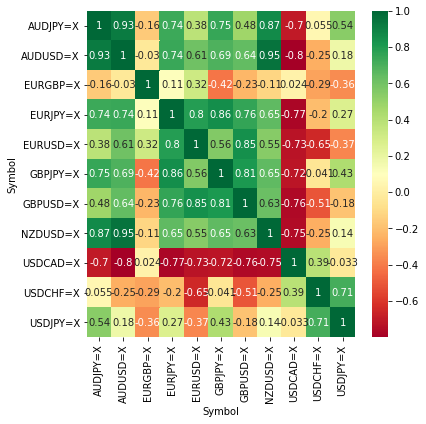

In [7]:
# Finally, we can plot a heatmap of the correlations (with Seaborn and Matplotlib) to better visualize the results:
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(corr_df, annot=True, cmap="RdYlGn")